In [2]:
from sklearn import datasets
from sklearn import model_selection
iris =  datasets.load_iris()

In [3]:
import pandas as pd
import numpy as np 

In [4]:

iris_pd= pd.DataFrame(data = np.c_[iris['data'],iris['target']],columns=iris['feature_names'] + ['target'])
iris_pd_train_X, iris_pd_test_X, iris_pd_train_y, iris_pd_test_y = model_selection.train_test_split(
    iris_pd.drop(columns='target'), iris_pd['target'], test_size=0.2, random_state=40)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

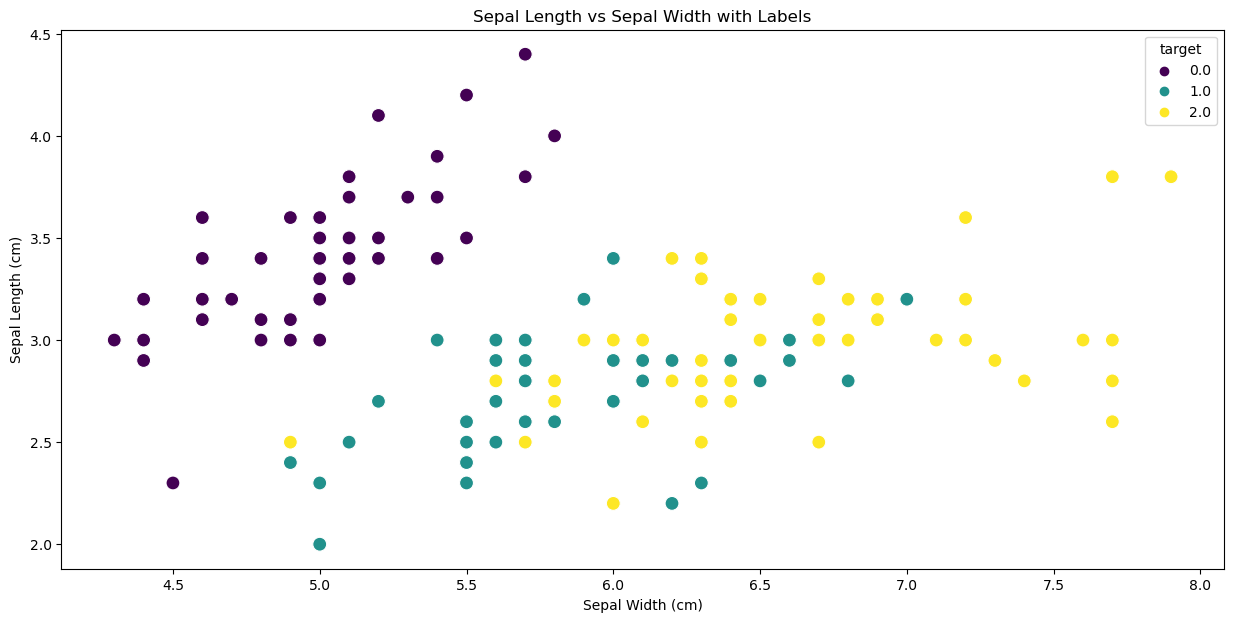

In [6]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=iris_pd, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='viridis', s=100)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length vs Sepal Width with Labels')
plt.show()

In [7]:

def encode_setosa(p):
   if p != 0:
       return 0 
   else:
       return 1
   
def encode_veriscolor(p):
   if p != 1:
       return 0 
   else:
       return 1   

class AdaLine:
    def __init__(self):
        self.weights = None
        self.bias = None
        self.costs=None
    def predict(self,input):
        net = np.dot(input,self.weights)+ self.bias
        return np.where(net >= 0 ,1 , -1)
    def train(self,input,target,learning_rate,epochs):
        self.bias = 0
        self.costs=[]
        self.nets= []
        self.weights = np.zeros(input.shape[1])
        for i in range(epochs):
            net_ = np.dot(input,self.weights) + self.bias
            errors = target - net_
            self.weights += learning_rate *  (np.dot(input.T,errors))
            self.bias += learning_rate  * np.sum(errors)
            cost  = np.sum(errors ** 2) / 2
            self.costs.append(cost) 
            self.nets.append(net_)

# Preparing the data for the first class & Cost function over training epochs

c:\Users\MCA\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


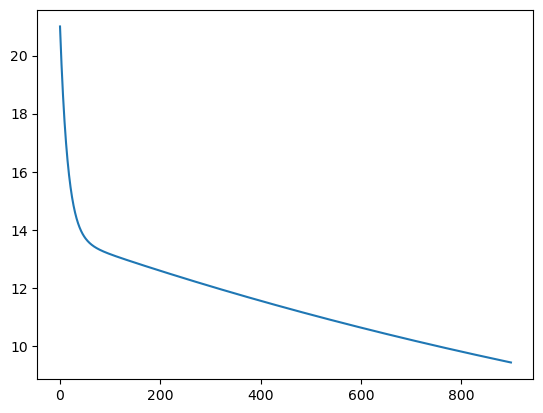

In [8]:
ada = AdaLine()            
X = iris_pd_train_X.drop(
    columns=['petal length (cm)', 'petal width (cm)'])
X= (X - np.var(X)) / np.mean(X)
y = iris_pd_train_y
y= np.vectorize(encode_setosa)(y) 
ada.train(X,y,0.0001,900)        
costs = np.array(ada.costs)
import matplotlib.pyplot as plt
x_s = [ 1 * i for i in range(len(costs)) ]
plt.plot(x_s,costs)
plt.show()

# Predicting the test data

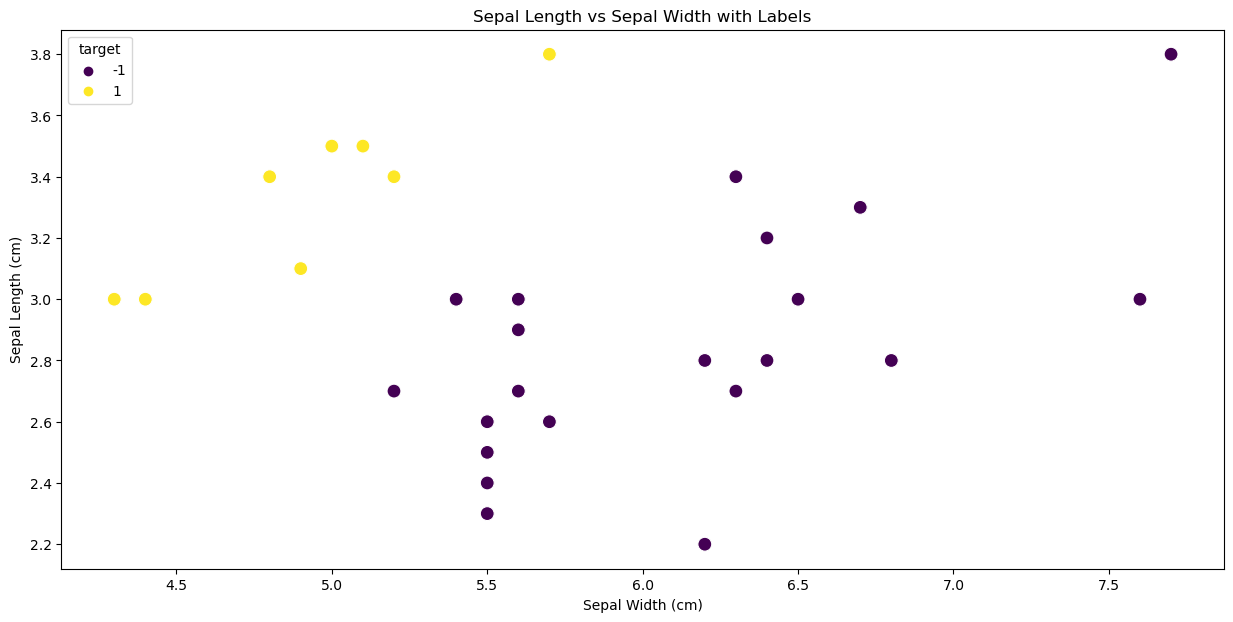

In [9]:
new_iris_pd_input = iris_pd_test_X.drop(columns=['petal length (cm)','petal width (cm)'])
predictions = ada.predict(new_iris_pd_input)
new_iris_pd_input['target'] =  predictions
plt.figure(figsize=(15, 7))
sns.scatterplot(data=new_iris_pd_input, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='viridis', s=100)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length vs Sepal Width with Labels')
plt.show()

# Accuracy on Test

In [10]:
dummy_iris_test_y = iris_pd_test_y
dummy_iris_test_y[dummy_iris_test_y != 0] = -1
from sklearn.metrics import accuracy_score
accuracy_score(predictions,dummy_iris_test_y)

0.7333333333333333

# Predicting all of the data even with train

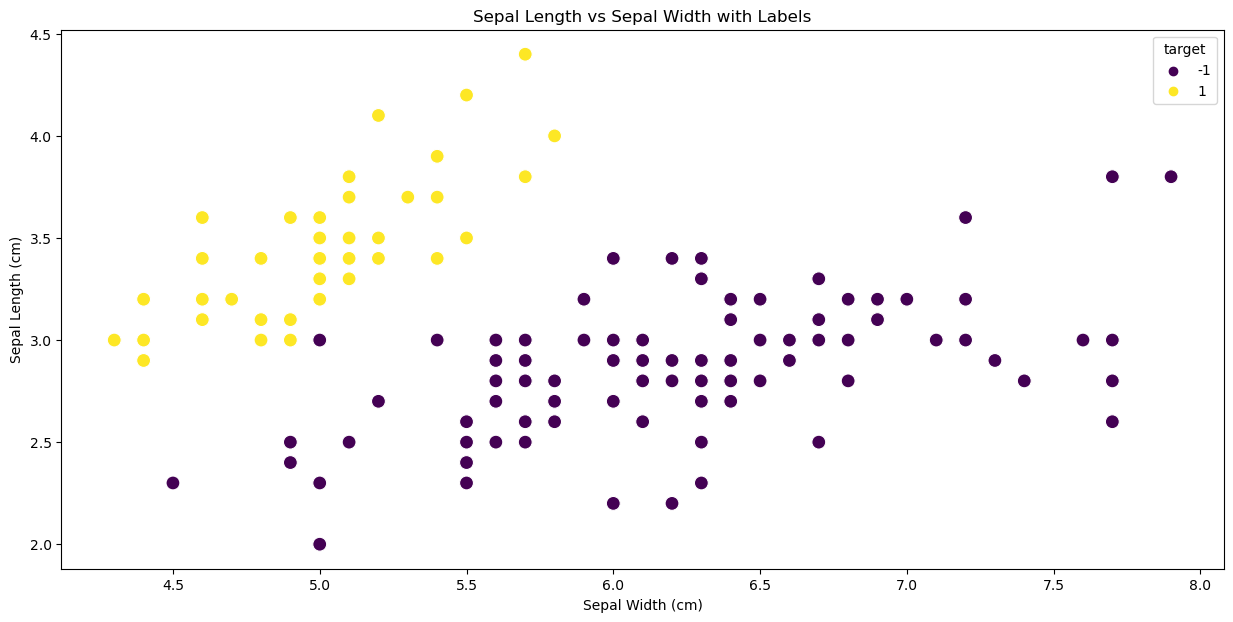

In [11]:
new_iris_pd_input = iris_pd.drop(columns=['target','petal length (cm)','petal width (cm)'])
predictions = ada.predict(new_iris_pd_input)
# new_iris_pd_input['target_hat'] = new_iris_pd_input['target']
new_iris_pd_input['target'] =  predictions
plt.figure(figsize=(15, 7))
sns.scatterplot(data=new_iris_pd_input, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='viridis', s=100)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length vs Sepal Width with Labels')
plt.show()

In [12]:
dummy_iris_test_y= iris_pd
dummy_iris_test_y['target'][dummy_iris_test_y['target'] != 0] = -1
accuracy_score(predictions,dummy_iris_test_y['target'])

0.6666666666666666

# Veriscolor

/home/syntheticdemon/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


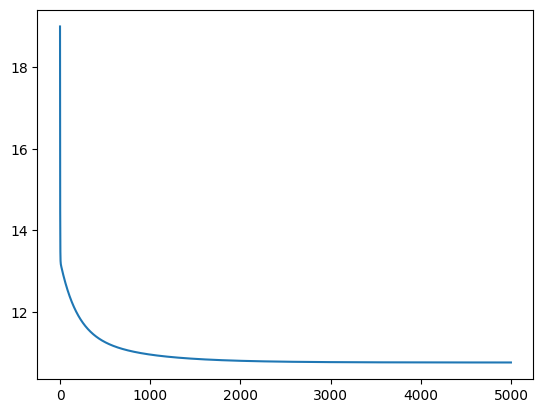

In [ ]:
ada_1 = AdaLine()            
X=iris_pd_train_X.drop(columns=['petal length (cm)','petal width (cm)'])
X= (X - np.var(X)) / np.mean(X)
y= iris_pd_train_y
y= np.vectorize(encode_veriscolor)(y) 
ada_1.train(X,y,0.001,5000)        
costs = np.array(ada_1.costs)
x_s = [ 1 * i for i in range(len(costs)) ]
plt.plot(x_s,costs)
plt.show()

# Test Data Test

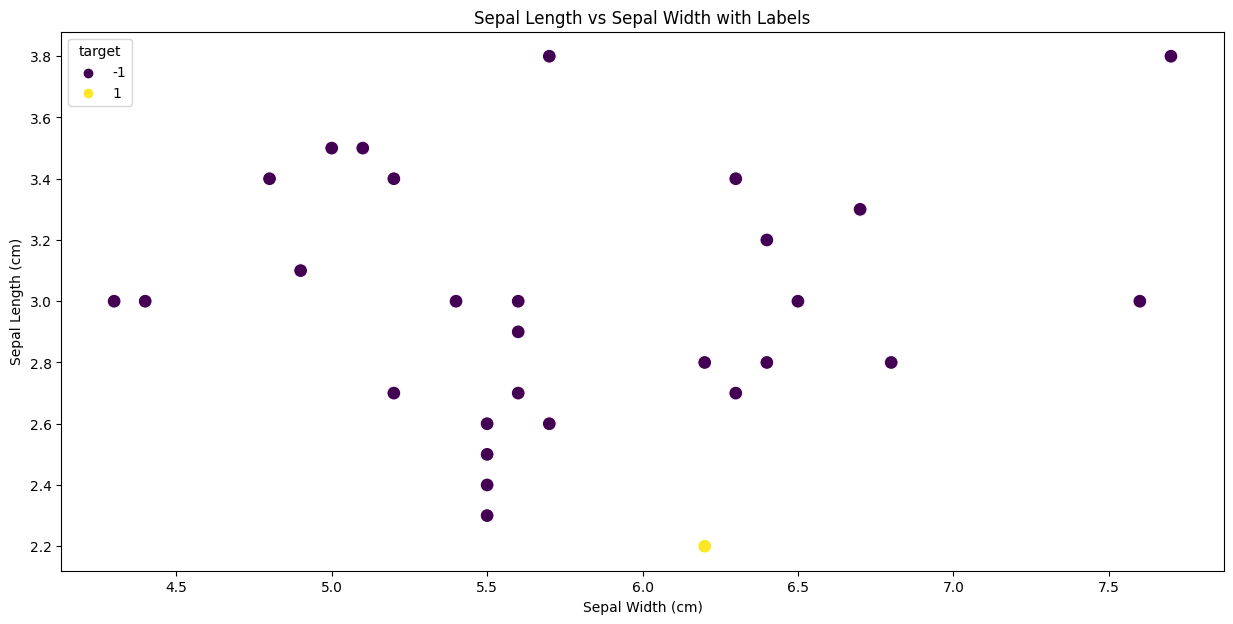

In [179]:
new_iris_pd_input = iris_pd_test_X.drop(columns=['petal length (cm)','petal width (cm)'])
predictions = ada_1.predict(new_iris_pd_input)
new_iris_pd_input['target'] =  predictions
plt.figure(figsize=(15, 7))
sns.scatterplot(data=new_iris_pd_input, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='viridis', s=100)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length vs Sepal Width with Labels')
plt.show()

In [181]:
dummy_iris_test_y_veriscolor= iris_pd_test_y
dummy_iris_test_y_veriscolor[dummy_iris_test_y_veriscolor != 2] = 1
accuracy_score(predictions,dummy_iris_test_y_veriscolor)

0.03333333333333333

# Versicolor Training data test 

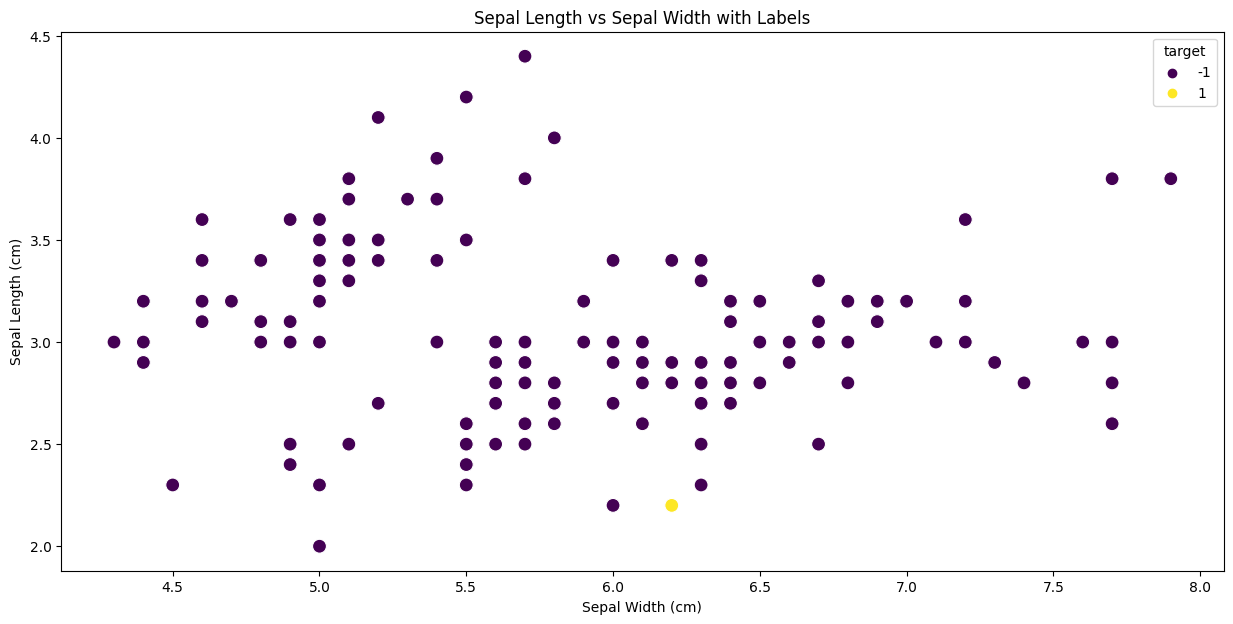

In [184]:
new_iris_pd_input = iris_pd.drop(columns=['target','petal length (cm)','petal width (cm)'])
predictions = ada_1.predict(new_iris_pd_input)
new_iris_pd_input['target'] =  predictions
plt.figure(figsize=(15, 7))
sns.scatterplot(data=new_iris_pd_input, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='viridis', s=100)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length vs Sepal Width with Labels')
plt.show()

In [191]:
dummy_iris_veriscolor_y= iris_pd['target']
dummy_iris_veriscolor[dummy_iris_test_veriscolor != 2] = 1
accuracy_score(predictions,dummy_iris_veriscolor_y)

0.006666666666666667

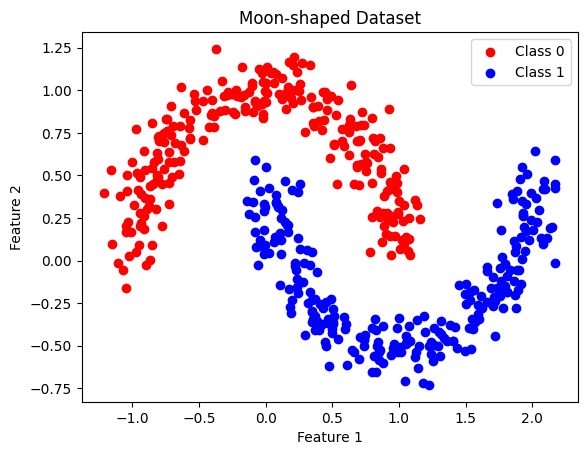

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X_moons, Y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)
X_train_moons, X_test_moons, Y_train_moons, Y_test_moons = train_test_split(X_moons,
Y_moons, test_size=0.5, random_state=3)
plt.scatter(X_moons[Y_moons == 0][:, 0], X_moons[Y_moons == 0][:, 1], color='red',
label='Class 0')
plt.scatter(X_moons[Y_moons == 1][:, 0], X_moons[Y_moons == 1][:, 1], color='blue',
label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Moon-shaped Dataset")
plt.show()


In [ ]:
import pandas as pd
from sklearn import datasets
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

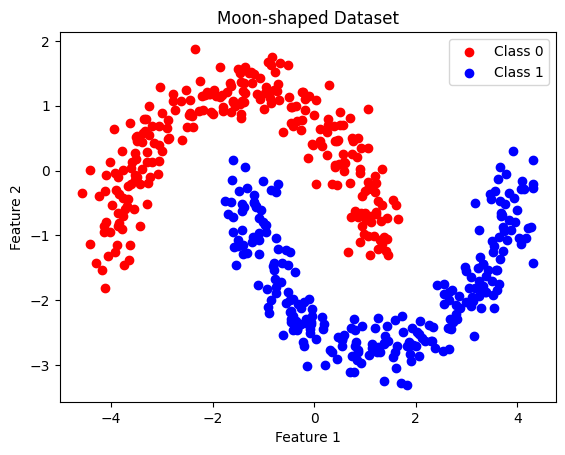

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X_moons, Y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)
X_moons =(X_moons - X_moons.var() ) / X_moons.mean()
X_train_moons, X_test_moons, Y_train_moons, Y_test_moons = train_test_split(X_moons,
Y_moons, test_size=0.2, random_state=10)
plt.scatter(X_moons[Y_moons == 0][:, 0], X_moons[Y_moons == 0][:, 1], color='red',
label='Class 0')
plt.scatter(X_moons[Y_moons == 1][:, 0], X_moons[Y_moons == 1][:, 1], color='blue',
label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Moon-shaped Dataset")
plt.show()

In [192]:
# Code taken from the question 2 of some other place
import copy
class Madaline:
    def __init__(self, num_l, n_iter=500, learning_rate=0.1):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        np.random.seed()
        self.weights = np.random.rand(num_l, 2)
        self.v = [1] * num_l
        self.b = np.random.rand(num_l, 1)
        self.b2 = num_l - 1
    def fit(self, X, Y):
        count = 0
        self.cost_ = [] 
        for iter in range(self.n_iter):
            old_weights = copy.deepcopy(self.weights)
            for x, label in zip(X, Y):
                z_in = np.array([np.matmul(x, self.weights.T)]).T + self.b
                z = np.heaviside(z_in, 1) * 2 - 1
                y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
                y = np.heaviside(y_in, 1) * 2 - 1
                if y != label:
                    if label == 1:
                        z_j = max(z_in)
                        ind = np.where(z_in == z_j)
                        self.weights[ind, :] = self.weights[ind, :] + self.learning_rate * (1 - z_in[ind]) * np.array(x) 
                        self.b[ind] = self.b[ind] + self.learning_rate * (1 - z_in[ind])           
                    else:
                        ind = [i for i, x in enumerate(z_in) if x > 0]
                        for indice in ind:
                            self.weights[indice, :] = self.weights[indice, :] + self.learning_rate * (
                                    -1 - z_in[indice]) * np.array(x)
                            self.b[indice] = self.b[indice] + self.learning_rate * (-1 - z_in[indice])


            self.cost_.append(self.error(self.predict(X), Y))   #append error in cost list

            if np.all((self.weights - old_weights) < 0.0001) and iter > 10:
                count += 1
                if count > 10:
                    print("Total iterations with", len(self.b), "lines:", iter + 1)
                    break
    def predict(self, X):
        y = []
        for x in X:
            z_in = np.array([np.matmul(x, self.weights.T)]).T + self.b
            z = np.heaviside(z_in, 1) * 2 - 1
            y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
            y.append(np.heaviside(y_in, 1) * 2 - 1)
        return y
    #define error function for madaline model
    def error(self, net, t):
      self.err = ((t-net)**2).sum()/2.
      return self.err


In [213]:
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
def batch_plot(X,Y,predictions,nc,m) :
    for i in range(nc):
        plt.axline((0, float(-m.b[i] / m.weights[i][1])), slope=-m.weights[i][0] / m.weights[i][1])
    colors = ( 'red', 'blue')
    cmap = ListedColormap(colors[ : len(np.unique(predictions+0.5))])
    plt.scatter(X[:,0], X[:,1], c=predictions,cmap=cmap)
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    plt.show()
    print("Accuracy of the model was :" , accuracy_score(Y,predictions) ,"Neuron Count :", nc)
    plt.plot(m.cost_)
    plt.title('Loss Graph')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.grid()
    plt.show()
         

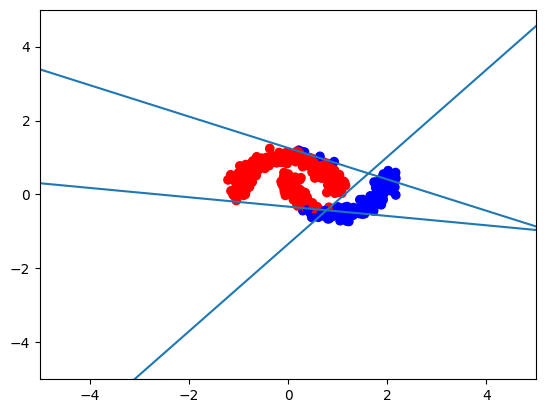

Accuracy of the model was : 0.816 Neuron Count : 3


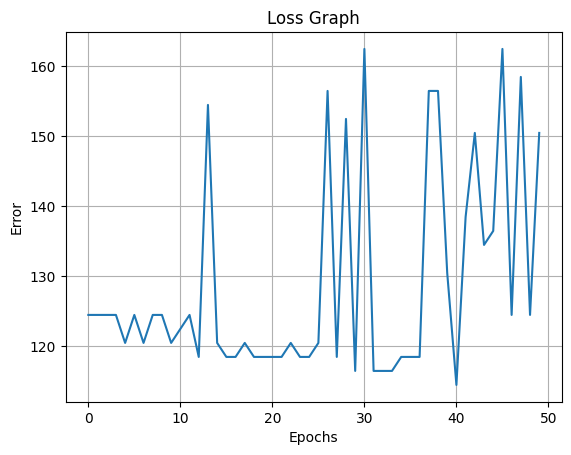

Total iterations with 5 lines: 43


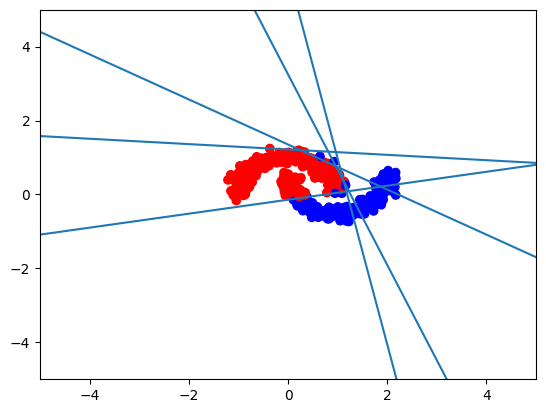

Accuracy of the model was : 0.886 Neuron Count : 5


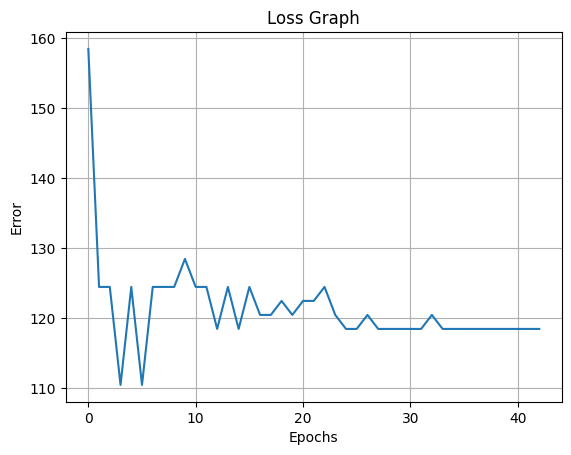

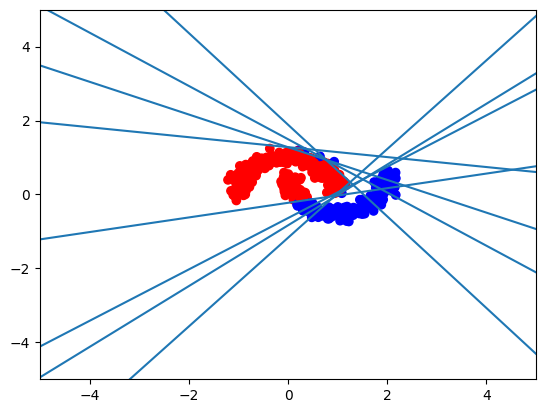

Accuracy of the model was : 0.874 Neuron Count : 8


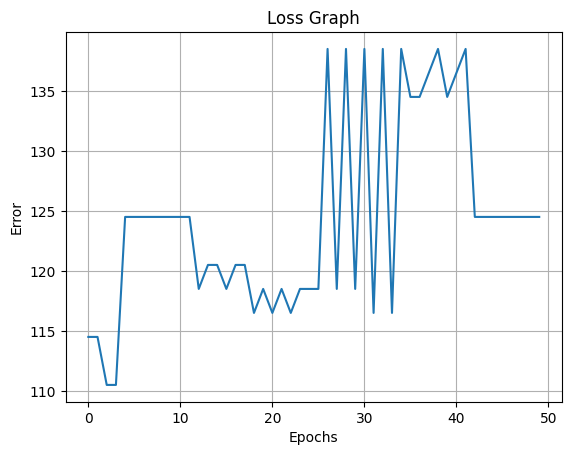

In [218]:
neuron_counts = [3,5,8]
for t,nc in enumerate(neuron_counts):    
    m= Madaline(nc,50,0.01)
    m.fit(X_train_moons,Y_train_moons)
    for input_set,target_set in zip([
                                    # X_train_moons
                                    #  , X_test_moons
                                     X_moons],[
                                    #  Y_train_moons
                                    #  ,Y_test_moons
                                         Y_moons]):
        predictions = m.predict(input_set)
        predictions = np.vectorize(lambda t : int (t == 1))(predictions)
        batch_plot(input_set,target_set,predictions,nc,m)